## Feature Scaling

### Types of Feature Scaling

#### 2. Normalization (Min-Max Scaling):

Normalization is a feature scaling technique used to adjust the values of numerical data into a common scale, typically a range between [0, 1] or [-1, 1], using Min-Max Scaling. This transformation makes sure that all features are comparable and can help improve the performance of machine learning algorithms that rely on distance or gradient-based optimization.

**Types of Normalization:**

* MinMax Scaling
* Mean Normalization
* Max Absolute
* Robust Scaling

**Min-Max Normalization (Scaling between 0 and 1)**

This method transforms the data using the minimum and maximum values of the feature.

X 
norm
​
 = 
X−min(X) / max(X)−min(X)
​


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Creating a sample dataset
data = pd.DataFrame({
    'Height': [170, 160, 180, 150, 175],
    'Weight': [70, 55, 80, 50, 75],
    'Category': [1, 2, 1, 2, 1] 
})

In [13]:
df = pd.DataFrame(data)

<AxesSubplot: xlabel='Height', ylabel='Density'>

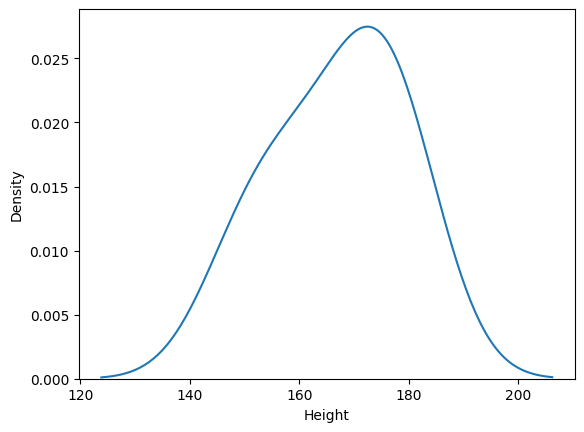

In [14]:
sns.kdeplot(df['Height'])

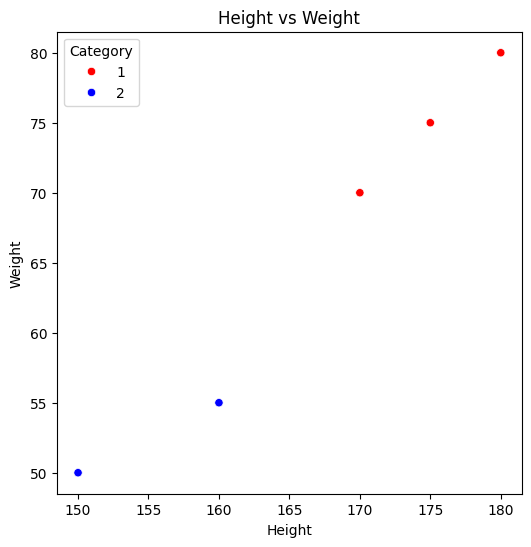

In [20]:
color_dict = {1: 'red', 2: 'blue'}

# Creating the scatterplot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Height', y='Weight', hue='Category', data=data, palette=color_dict)
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [21]:
# Min-Max Normalization
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

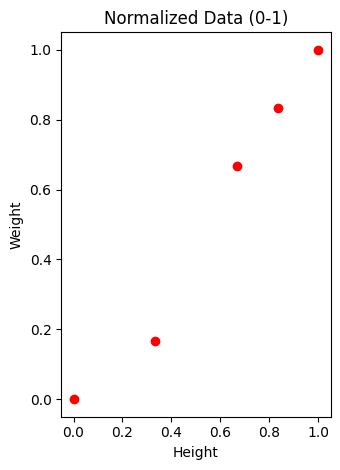

In [22]:
# Plot the normalized data
plt.subplot(1, 2, 2)
plt.scatter(df_normalized['Height'], df_normalized['Weight'], color='red')
plt.title('Normalized Data (0-1)')
plt.xlabel('Height')
plt.ylabel('Weight')

plt.tight_layout()
plt.show()

**Mean Normalization**

Mean normalization is a technique used to scale data. In mean normalization, we rescale the features to have a mean of 0 and scale them between -1 and 1, or between other ranges depending on the data. The formula used for mean normalization is:

x 
norm
​
 = 
x−mean(x) / max(x)−min(x)

In [23]:
data = pd.DataFrame({
    'Height': [170, 160, 180, 150, 175],
    'Weight': [70, 55, 80, 50, 75]
})

# Mean normalization formula
def mean_normalize(column):
    return (column - column.mean()) / (column.max() - column.min())

# Applying mean normalization
data['Height_norm'] = mean_normalize(data['Height'])
data['Weight_norm'] = mean_normalize(data['Weight'])

# Displaying the original and normalized data
print("Original Data:\n", data[['Height', 'Weight']])
print("\nMean Normalized Data:\n", data[['Height_norm', 'Weight_norm']])

Original Data:
    Height  Weight
0     170      70
1     160      55
2     180      80
3     150      50
4     175      75

Mean Normalized Data:
    Height_norm  Weight_norm
0     0.100000     0.133333
1    -0.233333    -0.366667
2     0.433333     0.466667
3    -0.566667    -0.533333
4     0.266667     0.300000


**MaxAbs Scaling (Scaling between -1 and 1)**

This method scales the data by its maximum absolute value.

X 
norm
​
 = 
X / max(∣X∣)
​

In [27]:
from sklearn.preprocessing import MaxAbsScaler

data = pd.DataFrame({
    'Height': [170, -160, 180, -150, 175],
    'Weight': [70, -55, 80, -50, 75]
})

# Creating the MaxAbsScaler object
scaler = MaxAbsScaler()

# Applying MaxAbs Scaling to the dataset
data_scaled = scaler.fit_transform(data)

# Converting the scaled data back to a DataFrame for better visualization
data_scaled_df = pd.DataFrame(data_scaled, columns=['Height_scaled', 'Weight_scaled'])

# Displaying the original and scaled data
print("Original Data:\n", data)
print("\nMaxAbs Scaled Data:\n", data_scaled_df)

Original Data:
    Height  Weight
0     170      70
1    -160     -55
2     180      80
3    -150     -50
4     175      75

MaxAbs Scaled Data:
    Height_scaled  Weight_scaled
0       0.944444         0.8750
1      -0.888889        -0.6875
2       1.000000         1.0000
3      -0.833333        -0.6250
4       0.972222         0.9375


**MaxAbs scaling is useful when:**

* You have sparse data (e.g., text data after vectorization).
* You need to scale features but want to maintain zero entries and avoid adding any bias (e.g., no mean subtraction like in standardization).

**Robust Scaling**

Robust Scaling is a feature scaling technique that is robust to outliers. Unlike Standardization (which scales data based on mean and standard deviation), Robust Scaling uses the median and the interquartile range (IQR) for scaling, which reduces the influence of outliers.

x 
scaled
​
 = 
x−median(x) / IQR(x)
​


In [28]:
from sklearn.preprocessing import RobustScaler

# Creating a sample dataset with outliers
data = pd.DataFrame({
    'Height': [170, 160, 180, 150, 175, 400], 
    'Weight': [70, 55, 80, 50, 75, 200] 
})

# Creating the RobustScaler object
scaler = RobustScaler()

# Applying Robust Scaling to the dataset
data_scaled = scaler.fit_transform(data)

# Converting the scaled data back to a DataFrame for better visualization
data_scaled_df = pd.DataFrame(data_scaled, columns=['Height_scaled', 'Weight_scaled'])

# Displaying the original and scaled data
print("Original Data:\n", data)
print("\nRobust Scaled Data:\n", data_scaled_df)

Original Data:
    Height  Weight
0     170      70
1     160      55
2     180      80
3     150      50
4     175      75
5     400     200

Robust Scaled Data:
    Height_scaled  Weight_scaled
0      -0.153846         -0.125
1      -0.769231         -0.875
2       0.461538          0.375
3      -1.384615         -1.125
4       0.153846          0.125
5      14.000000          6.375


### When to Use Normalization?

**Distance-based Algorithms:** Normalization is crucial for algorithms that calculate distances between data points, such as:

* K-Nearest Neighbors (KNN)
* K-Means Clustering
* Support Vector Machines (SVM)

**Gradient Descent Optimization:** Like standardization, normalization can help speed up convergence in models that use gradient-based optimization, such as **Neural Networks** and **Logistic Regression**.

**When Features Have Different Scales:** If features have different scales and you want all features to have equal importance in the model, normalization will bring them into a comparable range.